# calculate key metabolic populations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#extract simulate biomass matrix
import pickle

with open("../../results/simulation_result.pkl", "rb") as f:
    result = pickle.load(f)
    print("data len:",len(result))

def extract_biomass_matrix(result):
    rows = []
    for env_idx, model_results in result.items():
        for model_id, (biomass, _) in model_results.items():
            rows.append({
                "model_id": model_id,
                "env_idx": env_idx,
                "biomass": biomass
            })
    
    df = pd.DataFrame(rows)
    biomass_matrix = df.pivot(index="model_id", columns="env_idx", values="biomass")
    return biomass_matrix.fillna(0)

biomass_df = extract_biomass_matrix(result)
biomass_df

data len: 2000


env_idx,1,2,3,4,5,6,7,8,9,10,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
model_id,,,,,,,,,,,,,,,,,,,,,
MAG001_gapfilled_noO2,4.637470,53.788062,180.093446,182.854012,136.579079,181.424849,186.817215,136.748957,51.736027,182.717531,...,160.734995,183.378887,55.360971,60.254664,179.778509,183.925382,184.607031,192.540031,140.549628,16.813204
MAG002_gapfilled_noO2,11.890949,137.918107,201.721634,205.623068,203.838299,203.956319,204.494159,200.221946,132.656480,205.086820,...,106.189674,204.067681,141.951207,154.499139,199.918570,210.857537,207.577682,224.298634,200.671796,43.110780
MAG003_gapfilled_noO2,4.637470,12.169564,12.151886,12.394265,12.205488,11.979301,11.982206,11.963983,12.001421,11.987149,...,12.049943,12.452075,12.138903,12.763816,11.981478,12.119597,11.963699,14.063902,12.090143,11.978280
MAG004_gapfilled_noO2,4.637470,53.788062,296.495695,447.021900,136.579079,202.350044,440.068604,136.748957,51.736027,129.159584,...,41.413973,446.647739,55.360971,60.254664,357.309197,444.889740,445.039964,355.887773,140.549628,16.813204
MAG005_gapfilled_noO2,164.078598,137.918107,163.821734,165.915036,164.038737,163.963367,165.783861,163.723924,163.657140,164.653957,...,164.350523,166.158424,39.843819,165.832958,163.700662,165.031953,164.831590,166.569298,164.243096,43.110780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAG236_gapfilled_noO2,11.890949,137.918107,760.245373,1000.000000,350.202766,615.967851,1000.000000,350.638352,210.551242,770.854189,...,106.189674,1000.000000,141.951207,154.499139,916.177428,1000.000000,1000.000000,1000.000000,1000.000000,43.110780
MAG237_gapfilled_noO2,4.637470,53.788062,201.025268,441.578549,136.579079,135.214195,152.538014,136.748957,51.736027,129.159584,...,41.413973,181.710918,55.360971,60.254664,126.171079,191.584291,68.017030,355.887773,140.549628,16.813204
MAG238_gapfilled_noO2,11.890949,133.760113,133.760113,133.760113,133.588749,133.760113,133.760113,71.109931,44.070953,133.760113,...,133.741498,133.652337,133.760113,133.760113,133.553624,133.760113,133.760113,133.760113,133.511435,43.110780


In [2]:
# read abundance data 
file_path = "../../data/genome/median_coverage_genomes.parquet"
df = pd.read_parquet(file_path)
df

Genome,index,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,...,MAG231,MAG232,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240
0,NSg1AJ41C,144.805,106.79,23.15,97.310,80.285,24.04,23.51,46.90,116.28,...,0.000,0.070,0.360,0.00,0.13,0.00,0.000,1.34,0.000,0.00
1,NSg1BJ41C,0.000,123.42,11.31,102.315,10.950,26.28,24.30,54.29,68.63,...,0.000,0.070,0.370,0.00,0.14,0.00,0.000,1.37,0.000,0.00
2,NSg1CJ41C,0.000,71.37,0.00,0.000,0.640,22.18,28.28,41.80,39.50,...,0.000,0.090,0.490,0.00,0.11,0.00,0.000,1.26,0.000,0.00
3,R1J142A,0.000,0.00,0.00,0.000,0.090,0.00,0.00,0.00,0.00,...,0.000,1.980,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.00
4,R2J142A,0.000,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,...,0.000,1.020,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.00
5,R3J142A,0.000,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,...,0.000,14.980,0.000,0.00,0.00,1.91,0.000,0.00,0.000,0.00
6,R4J147A,0.000,23.51,0.00,0.000,0.000,0.00,0.00,0.52,0.10,...,0.000,0.000,2.930,0.00,0.00,0.00,0.000,0.26,0.000,0.00
7,R4J147C,0.000,3.82,0.00,7.750,0.270,0.00,0.60,39.60,0.00,...,0.000,0.120,0.000,0.00,0.27,0.00,0.000,1.01,0.000,0.00
8,R5J141A,0.000,21.74,0.19,0.000,0.000,0.00,0.02,0.61,0.00,...,0.000,0.000,0.270,0.00,0.00,0.00,0.000,0.21,0.000,0.00
9,R5J141C,0.000,0.83,0.00,1.790,4.460,0.00,1.06,39.81,0.00,...,0.000,0.040,0.000,0.00,0.32,0.00,0.000,1.21,0.000,0.00


In [3]:
# read relative abundance data 
df = pd.read_csv("../../results/relative_abundance.csv")
df = df.rename(columns={"Sample": "index"})   
df

,index,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,...,MAG231,MAG232,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240
0,NSg1AJ41C,0.054366,0.040093,0.008691,0.036534,0.030142,0.009026,0.008827,0.017608,0.043656,...,0.000000,0.000026,0.000135,0.000000,0.000049,0.000000,0.000000,0.000503,0.000000,0.0000
1,NSg1BJ41C,0.000000,0.050180,0.004598,0.041599,0.004452,0.010685,0.009880,0.022073,0.027904,...,0.000000,0.000028,0.000150,0.000000,0.000057,0.000000,0.000000,0.000557,0.000000,0.0000
2,NSg1CJ41C,0.000000,0.030369,0.000000,0.000000,0.000272,0.009438,0.012034,0.017787,0.016808,...,0.000000,0.000038,0.000209,0.000000,0.000047,0.000000,0.000000,0.000536,0.000000,0.0000
3,R1J142A,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4,R2J142A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
5,R3J142A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004000,0.000000,0.000000,0.000000,0.000510,0.000000,0.000000,0.000000,0.0000
6,R4J147A,0.000000,0.006760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000029,...,0.000000,0.000000,0.000842,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.0000
7,R4J147C,0.000000,0.002058,0.000000,0.004176,0.000145,0.000000,0.000323,0.021337,0.000000,...,0.000000,0.000065,0.000000,0.000000,0.000145,0.000000,0.000000,0.000544,0.000000,0.0000
8,R5J141A,0.000000,0.006423,0.000056,0.000000,0.000000,0.000000,0.000006,0.000180,0.000000,...,0.000000,0.000000,0.000080,0.000000,0.000000,0.000000,0.000000,0.000062,0.000000,0.0000
9,R5J141C,0.000000,0.000480,0.000000,0.001034,0.002577,0.000000,0.000612,0.023001,0.000000,...,0.000000,0.000023,0.000000,0.000000,0.000185,0.000000,0.000000,0.000699,0.000000,0.0000


In [4]:
#cauculate mean biomass flux
biomass_df.index = biomass_df.index.str.replace('_gapfilled_noO2', '', regex=False)
biomass_flux_mean = biomass_df.mean(axis=1)
# abundance * biomass flux = weighted_biomass
common_mags = df.columns.intersection(biomass_flux_mean.index)
abundance_df = df[common_mags]
flux_df = biomass_flux_mean.loc[common_mags]

weighted_biomass = abundance_df.mul(flux_df, axis=1)
weighted_biomass["index"] = df["index"]

weighted_biomass

,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,MAG010,...,MAG232,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240,index
0,5.826897,5.992528,0.099311,5.886021,4.028169,1.263222,0.926890,1.473978,5.110688,1.180412,...,0.003675,0.012129,0.000000,0.002742,0.000000,0.000000,0.048655,0.000000,0.000000,NSg1AJ41C
1,0.000000,7.500130,0.052543,6.702046,0.594965,1.495459,1.037494,1.847743,3.266571,0.586006,...,0.003979,0.013500,0.000000,0.003198,0.000000,0.000000,0.053870,0.000000,0.000000,NSg1BJ41C
2,0.000000,4.539124,0.000000,0.000000,0.036394,1.320942,1.263665,1.488919,1.967652,0.098407,...,0.005355,0.018712,0.000000,0.002630,0.000000,0.000000,0.051852,0.000000,0.000000,NSg1CJ41C
3,0.000000,0.000000,0.000000,0.000000,0.002866,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.065960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R1J142A
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R2J142A
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.559228,0.000000,0.000000,0.000000,0.222996,0.000000,0.000000,0.000000,0.000000,R3J142A
6,0.000000,1.010330,0.000000,0.000000,0.000000,0.000000,0.000000,0.012516,0.003366,0.000000,...,0.000000,0.075603,0.000000,0.000000,0.000000,0.000000,0.007230,0.000000,0.000000,R4J147A
7,0.000000,0.307633,0.000000,0.672754,0.019441,0.000000,0.033948,1.786092,0.000000,0.011027,...,0.009040,0.000000,0.000000,0.008174,0.000000,0.000000,0.052630,0.000000,0.000000,R4J147C
8,0.000000,0.960079,0.000641,0.000000,0.000000,0.000000,0.000621,0.015087,0.000000,0.004233,...,0.000000,0.007159,0.000000,0.000000,0.000000,0.000000,0.006001,0.000000,0.000000,R5J141A
9,0.000000,0.071676,0.000000,0.166622,0.344369,0.000000,0.064313,1.925424,0.000000,0.027492,...,0.003231,0.000000,0.000000,0.010388,0.000000,0.000000,0.067611,0.000000,0.000000,R5J141C


In [5]:
# sample →  group
sample_to_group = {
    "R1J142A": "Saline_Anode",
    "R2J142A": "Saline_Anode",
    "R3J142A": "Saline_Anode",
    "R4J147A": "Non_saline_Anode",
    "R5J141A": "Non_saline_Anode",
    "R6J143A": "Non_saline_Anode",

    "R4J147C": "Non_saline_Cathode",
    "R5J141C": "Non_saline_Cathode",
    "R6J143C": "Non_saline_Cathode",

    "Sg1AJ36C": "Saline_Cathode",
    "Sg1BJ36C": "Saline_Cathode",
    "Sg1CJ36C": "Saline_Cathode",

    "NSg1AJ41C": "Non_saline_Cathode",
    "NSg1BJ41C": "Non_saline_Cathode",
    "NSg1CJ41C": "Non_saline_Cathode"
}

weighted_biomass["Group"] = weighted_biomass["index"].map(sample_to_group)
weighted_biomass

,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,MAG010,...,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240,index,Group
0,5.826897,5.992528,0.099311,5.886021,4.028169,1.263222,0.926890,1.473978,5.110688,1.180412,...,0.012129,0.000000,0.002742,0.000000,0.000000,0.048655,0.000000,0.000000,NSg1AJ41C,Non_saline_Cathode
1,0.000000,7.500130,0.052543,6.702046,0.594965,1.495459,1.037494,1.847743,3.266571,0.586006,...,0.013500,0.000000,0.003198,0.000000,0.000000,0.053870,0.000000,0.000000,NSg1BJ41C,Non_saline_Cathode
2,0.000000,4.539124,0.000000,0.000000,0.036394,1.320942,1.263665,1.488919,1.967652,0.098407,...,0.018712,0.000000,0.002630,0.000000,0.000000,0.051852,0.000000,0.000000,NSg1CJ41C,Non_saline_Cathode
3,0.000000,0.000000,0.000000,0.000000,0.002866,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R1J142A,Saline_Anode
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R2J142A,Saline_Anode
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.222996,0.000000,0.000000,0.000000,0.000000,R3J142A,Saline_Anode
6,0.000000,1.010330,0.000000,0.000000,0.000000,0.000000,0.000000,0.012516,0.003366,0.000000,...,0.075603,0.000000,0.000000,0.000000,0.000000,0.007230,0.000000,0.000000,R4J147A,Non_saline_Anode
7,0.000000,0.307633,0.000000,0.672754,0.019441,0.000000,0.033948,1.786092,0.000000,0.011027,...,0.000000,0.000000,0.008174,0.000000,0.000000,0.052630,0.000000,0.000000,R4J147C,Non_saline_Cathode
8,0.000000,0.960079,0.000641,0.000000,0.000000,0.000000,0.000621,0.015087,0.000000,0.004233,...,0.007159,0.000000,0.000000,0.000000,0.000000,0.006001,0.000000,0.000000,R5J141A,Non_saline_Anode
9,0.000000,0.071676,0.000000,0.166622,0.344369,0.000000,0.064313,1.925424,0.000000,0.027492,...,0.000000,0.000000,0.010388,0.000000,0.000000,0.067611,0.000000,0.000000,R5J141C,Non_saline_Cathode


In [6]:
mag_cols = [col for col in weighted_biomass.columns if col not in ['index', 'Group']]
grouped = weighted_biomass.groupby("Group")[mag_cols].mean().T
filtered = grouped.replace(0, pd.NA).dropna(how='all')
filtered.index.name = 'Genome' #### key change point ###
filtered

Group,Non_saline_Anode,Non_saline_Cathode,Saline_Anode,Saline_Cathode
Genome,,,,
MAG001,<NA>,0.97115,<NA>,<NA>
MAG002,0.858436,3.087271,<NA>,0.177582
MAG003,0.000214,0.025309,<NA>,<NA>
MAG004,<NA>,2.241055,<NA>,<NA>
MAG005,0.001462,0.838227,0.000955,0.000838
...,...,...,...,...
MAG236,<NA>,<NA>,0.074332,3.506107
MAG237,<NA>,<NA>,<NA>,1.47735
MAG238,0.007479,0.049839,<NA>,0.214939


In [7]:
# Read taxonomy data
taxonomy_df = pd.read_csv("../../data/class:anno/gtdb_taxonomy.tsv", sep="\t", index_col=0)
taxonomy_df = taxonomy_df.reset_index().rename(columns={"user_genome": "Genome"})
# add genus column
plot_df = filtered.reset_index().melt(id_vars="Genome", var_name="Group", value_name="Activity")
plot_df = plot_df.dropna(subset=["Activity"])
plot_df = plot_df.merge(taxonomy_df, how="left", on="Genome")

plot_df["genus"] = plot_df["genus"].fillna("Unclassified")
plot_df["genus"] = plot_df["genus"].astype(str).str.split("_").str[0]

plot_df

,Genome,Group,Activity,Domain,phylum,class,order,family,genus,species
0,MAG002,Non_saline_Anode,0.858436,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Dysgonomonadaceae,Proteiniphilum,Proteiniphilum sp001768325
1,MAG003,Non_saline_Anode,0.000214,Bacteria,Bacillota_A,Clostridia,Christensenellales,DTU072,CAG-1782,NaN
2,MAG005,Non_saline_Anode,0.001462,Bacteria,Pseudomonadota,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Stenotrophomonas,Stenotrophomonas acidaminiphila
3,MAG007,Non_saline_Anode,0.000207,Bacteria,Caldisericota,Caldisericia,JAAYUI01,JAAYUI01,JAAYUI01,JAAYUI01 sp017992475
4,MAG008,Non_saline_Anode,0.013139,Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales,Hyphomicrobiaceae,Hyphomicrobium,NaN
...,...,...,...,...,...,...,...,...,...,...
382,MAG236,Saline_Cathode,3.506107,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Dysgonomonadaceae,UBA2632,NaN
383,MAG237,Saline_Cathode,1.47735,Bacteria,Bacillota_B,Desulfitobacteriia,Desulfitobacteriales,Desulfitobacteriaceae,Desulfosporosinus,NaN
384,MAG238,Saline_Cathode,0.214939,Bacteria,Pseudomonadota,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Paracoccus,Paracoccus versutus
385,MAG239,Saline_Cathode,0.876295,Bacteria,Bacillota_B,Desulfotomaculia,Desulfotomaculales,Desulfohalotomaculaceae,Unclassified,NaN


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (41) than needed (27), which may not be intended.
  func(*plot_args, **plot_kwargs)
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (41) than needed (25), which may not be intended.
  func(*plot_args, **plot_kwargs)
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (41) than needed (15), which may not be intended.
  func(*plot_args, **plot_kwargs)
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (41)

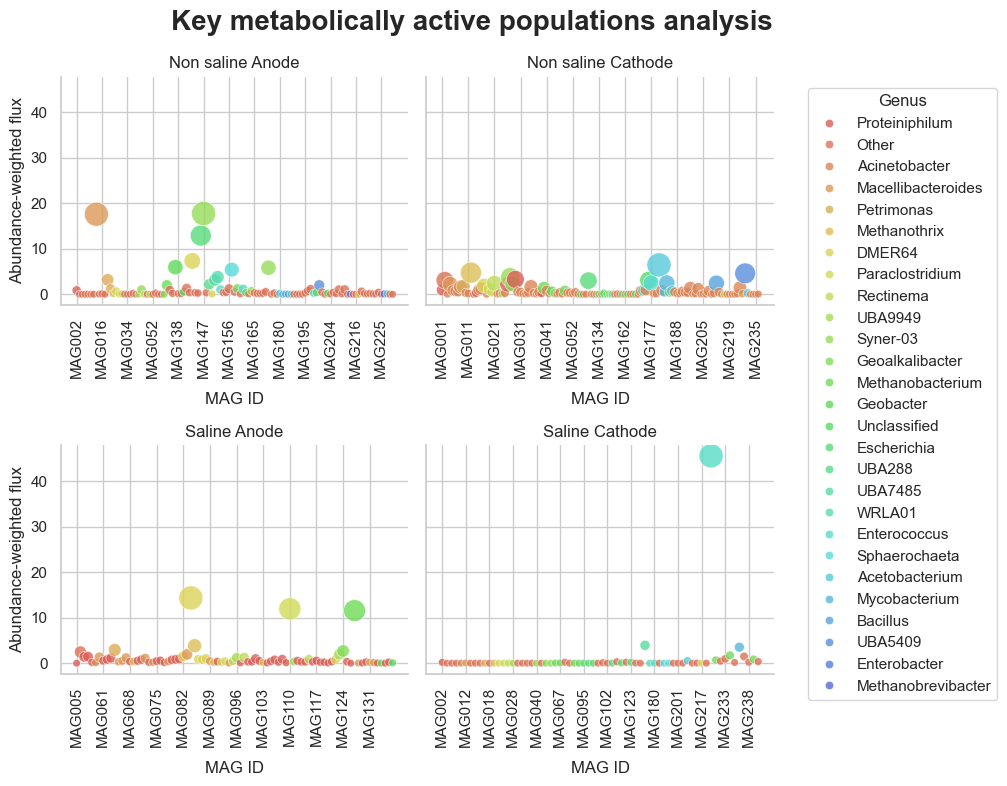

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==== data process ====
plot_df["Activity"] = pd.to_numeric(plot_df["Activity"], errors="coerce")
plot_df = plot_df.dropna(subset=["Activity"])
plot_df["genus"] = plot_df["genus"].fillna("Unclassified")
plot_df["Group"] = plot_df["Group"].str.replace("_", " ")

# ==== select top genus ====
top_n = 40
genus_scores = plot_df.groupby("genus")["Activity"].sum().sort_values(ascending=False)
top_genus = genus_scores.head(top_n).index
genus_order = [g for g in top_genus if g not in ["Unclassified", "Other"]]
genus_order += ["Unclassified", "Other"]

# ==== create display genus for plot ====
plot_df["GenusDisplay"] = plot_df["genus"].apply(lambda x: x if x in top_genus else "Other")

# ==== set color ====
palette = sns.color_palette("hls", n_colors=top_n + 1)

# ==== set FacetGrid ====
sns.set(style="whitegrid")
g = sns.FacetGrid(
    plot_df,
    col="Group",
    col_wrap=2,
    height=4,
    sharex=False,
    sharey=True
)

# ==== main plot：color=hue GenusDisplay，size=Activity ====
g.map_dataframe(
    sns.scatterplot,
    x="Genome", y="Activity",
    hue="GenusDisplay", size="Activity",
    sizes=(30, 300), alpha=0.8,
    palette=palette
)

# ==== remove none Genus size ====
handles, labels = g.axes[0].get_legend_handles_labels()
excluded_labels = {'Activity', 'genus', 'GenusDisplay'}
filtered = [
    (h, l) for h, l in zip(handles, labels)
    if l not in excluded_labels and not l.replace('.', '', 1).isdigit()
]


g.fig.legend(
    *zip(*filtered),
    title="Genus",
    loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

# ==== set x/y label ====
for ax in g.axes.flat:
    ax.set_xlabel("MAG ID", labelpad=10)
    ax.set_ylabel("Abundance-weighted flux")


# ==== cut x density ====
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
    xticks = ax.get_xticks()
    xticklabels = ax.get_xticklabels()
    step = max(1, int(len(xticks) / 12))#### Adjust step to control density ####
    ax.set_xticks(xticks[::step])
    ax.set_xticklabels(
        [label.get_text() for i, label in enumerate(xticklabels) if i % step == 0],
        rotation=90
    )

# ==== title  ====
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Key metabolically active populations analysis", 
               fontsize=20, fontweight='bold', x=0.6)
plt.tight_layout()
plt.show()



In [ ]:
color_palette = [
    "#1f77b4",  # 蓝色
    "#d9e6f2",  # 浅蓝灰
    "#ff7f0e",  # 橙色
    "#ffbb78",  # 浅橙
    "#2ca02c",  # 绿色
    "#98df8a",  # 浅绿
    "#d62728",  # 红色
    "#ff9896",  # 浅粉红
    "#9467bd",  # 紫色
    "#c5b0d5",  # 浅紫
    "#8c564b",  # 棕色
    "#c49c94",  # 浅棕
    "#f7b6d2",  # 粉色
    "#7f7f7f",  # 深灰
    "#c7c7c7",  # 中灰
    "#dbdb8d",  # 浅灰黄
    "#bcbd22",  # 黄绿
    "#ffeb99",  # 浅黄
    "#17becf",  # 青色
    "#9edae5",  # 浅青
    "#1f78b4",  # 靛蓝
    "#aec7e8",  # 淡蓝
]


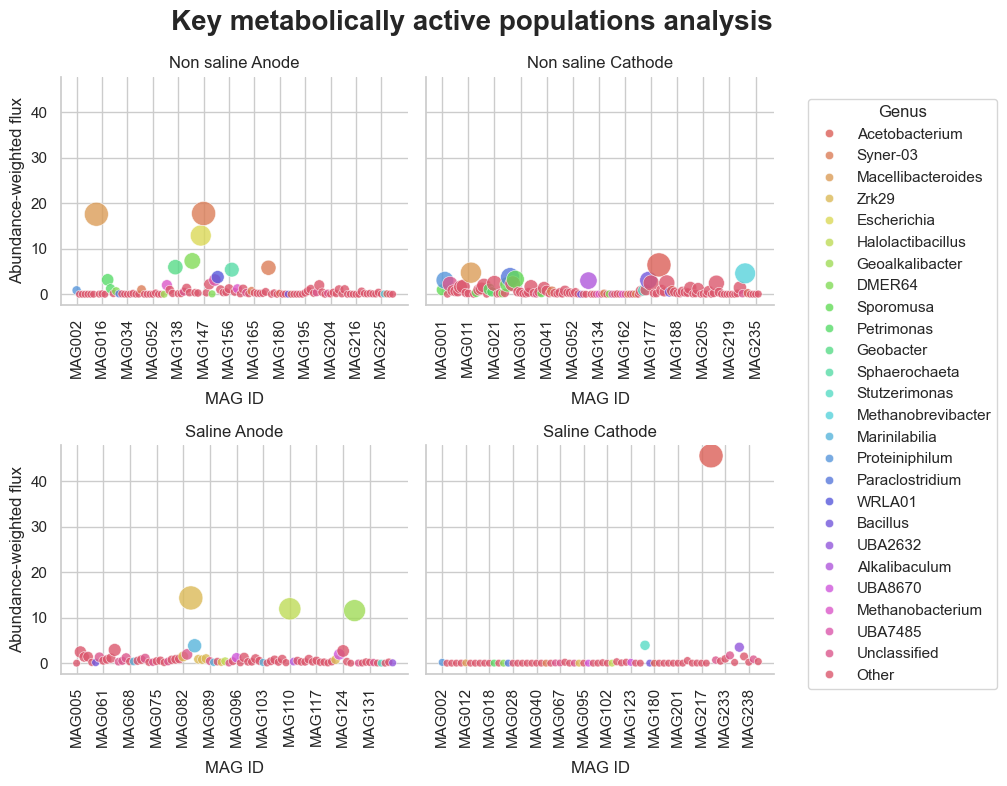

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# ==== data process ====
plot_df["Activity"] = pd.to_numeric(plot_df["Activity"], errors="coerce")
plot_df = plot_df.dropna(subset=["Activity"])
plot_df["genus"] = plot_df["genus"].fillna("Unclassified")
plot_df["Group"] = plot_df["Group"].str.replace("_", " ")

# ==== select top genus ====
top_n = 25
genus_scores = plot_df.groupby("genus")["Activity"].sum().sort_values(ascending=False)
top_genus = genus_scores.head(top_n).index

# ==== create display genus for plot ====
plot_df["GenusDisplay"] = plot_df["genus"].apply(lambda x: x if x in top_genus else "Other")

# ==== GenusDisplay sort ====
genus_order = [g for g in top_genus if g not in ["Unclassified", "Other"]]
genus_order += ["Unclassified", "Other"]

genus_cat = CategoricalDtype(categories=genus_order, ordered=True)
plot_df["GenusDisplay"] = plot_df["GenusDisplay"].astype(genus_cat)

# ==== set color palette ====
palette = sns.color_palette("hls", n_colors=len(genus_order))
palette_dict = dict(zip(genus_order, palette))

# ==== set FacetGrid ====
sns.set(style="whitegrid")
g = sns.FacetGrid(
    plot_df,
    col="Group",
    col_wrap=2,
    height=4,
    sharex=False,
    sharey=True
)

# ==== main plot：color=hue GenusDisplay，size=Activity ====
g.map_dataframe(
    sns.scatterplot,
    x="Genome", y="Activity",
    hue="GenusDisplay", size="Activity",
    sizes=(30, 300), alpha=0.8,
    palette=palette_dict
)

# ==== get and reorder legend ====
handles, labels = g.axes[0].get_legend_handles_labels()
label_handle_dict = {l: h for h, l in zip(handles, labels) if l in genus_order}
sorted_filtered = [(label_handle_dict[l], l) for l in genus_order if l in label_handle_dict]

g.fig.legend(
    *zip(*sorted_filtered),
    title="Genus",
    loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

# ==== set x/y label ====
for ax in g.axes.flat:
    ax.set_xlabel("MAG ID", labelpad=10)
    ax.set_ylabel("Abundance-weighted flux")

# ==== cut x density ====
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
    xticks = ax.get_xticks()
    xticklabels = ax.get_xticklabels()
    step = max(1, int(len(xticks) / 12))  # 控制密度
    ax.set_xticks(xticks[::step])
    ax.set_xticklabels(
        [label.get_text() for i, label in enumerate(xticklabels) if i % step == 0],
        rotation=90
    )

# ==== title  ====
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Key metabolically active populations analysis", 
               fontsize=20, fontweight='bold', x=0.6)
plt.tight_layout()
plt.show()


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_13186/3039815726.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("GenusDisplay")["Genome"]


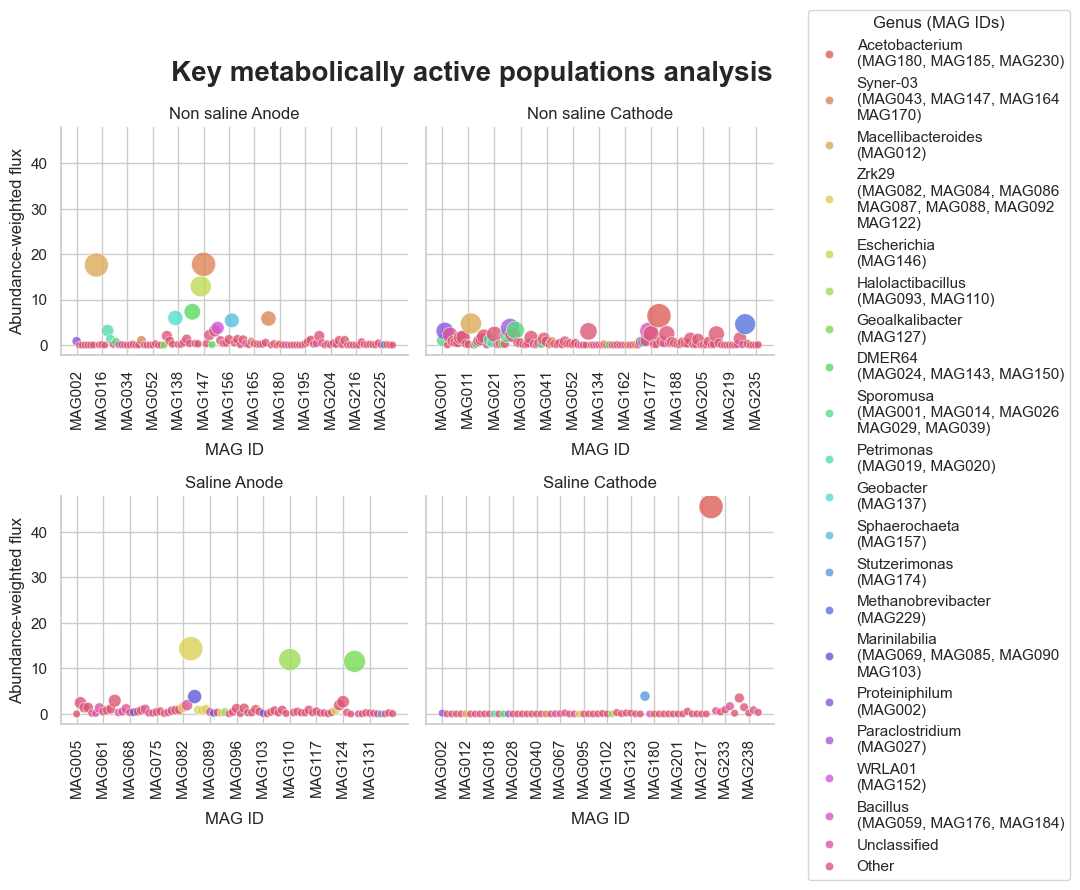

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# ==== data process ====
plot_df["Activity"] = pd.to_numeric(plot_df["Activity"], errors="coerce")
plot_df = plot_df.dropna(subset=["Activity"])
plot_df["genus"] = plot_df["genus"].fillna("Unclassified")
plot_df["Group"] = plot_df["Group"].str.replace("_", " ")

# ==== select top genus ====
top_n = 20
genus_scores = plot_df.groupby("genus")["Activity"].sum().sort_values(ascending=False)
top_genus = genus_scores.head(top_n).index

# ==== create display genus for plot ====
plot_df["GenusDisplay"] = plot_df["genus"].apply(lambda x: x if x in top_genus else "Other")

# ==== GenusDisplay sort ====
genus_order = [g for g in top_genus if g not in ["Unclassified", "Other"]]
genus_order += ["Unclassified", "Other"]
genus_cat = CategoricalDtype(categories=genus_order, ordered=True)
plot_df["GenusDisplay"] = plot_df["GenusDisplay"].astype(genus_cat)

# ==== wrap MAGs ====
def wrap_mags(mag_list, max_per_line=3):
    lines = [", ".join(mag_list[i:i + max_per_line]) for i in range(0, len(mag_list), max_per_line)]
    return "\n".join(lines)

# ==== build legend mapping with wrapped MAG IDs ====
genus_to_genomes = (
    plot_df[plot_df["GenusDisplay"].isin(genus_order) & (~plot_df["GenusDisplay"].isin(["Unclassified", "Other"]))]
    .groupby("GenusDisplay")["Genome"]
    .unique()
    .apply(lambda mags: wrap_mags(sorted(mags)))
    .to_dict()
)

# ==== build genus label dictionary with MAG IDs ====
genus_label_dict = {
    genus: genus if genus in ["Unclassified", "Other"]
    else f"{genus}\n({genus_to_genomes.get(genus, '')})"
    for genus in genus_order
}

# ==== set color palette ====
palette = sns.color_palette("hls", n_colors=len(genus_order))
palette_dict = dict(zip(genus_order, palette))

# ==== set FacetGrid ====
sns.set(style="whitegrid")
g = sns.FacetGrid(
    plot_df,
    col="Group",
    col_wrap=2,
    height=4,
    sharex=False,
    sharey=True
)

# ==== main plot：color=hue GenusDisplay，size=Activity ====
g.map_dataframe(
    sns.scatterplot,
    x="Genome", y="Activity",
    hue="GenusDisplay", size="Activity",
    sizes=(30, 300), alpha=0.8,
    palette=palette_dict
)

# ==== get and reorder legend ====
handles, labels = g.axes[0].get_legend_handles_labels()
label_handle_dict = {l: h for h, l in zip(handles, labels) if l in genus_order}
sorted_filtered = [(label_handle_dict[l], genus_label_dict.get(l, l)) for l in genus_order if l in label_handle_dict]

g.fig.legend(
    *zip(*sorted_filtered),
    title="Genus (MAG IDs)",
    loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

# ==== set x/y label ====
for ax in g.axes.flat:
    ax.set_xlabel("MAG ID", labelpad=10)
    ax.set_ylabel("Abundance-weighted flux")

# ==== cut x density ====
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
    xticks = ax.get_xticks()
    xticklabels = ax.get_xticklabels()
    step = max(1, int(len(xticks) / 12))
    ax.set_xticks(xticks[::step])
    ax.set_xticklabels(
        [label.get_text() for i, label in enumerate(xticklabels) if i % step == 0],
        rotation=90
    )

# ==== title ====
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Key metabolically active populations analysis", 
               fontsize=20, fontweight='bold', x=0.6)
plt.tight_layout()
plt.show()


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_13186/3641134595.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("GenusDisplay")["Genome"]


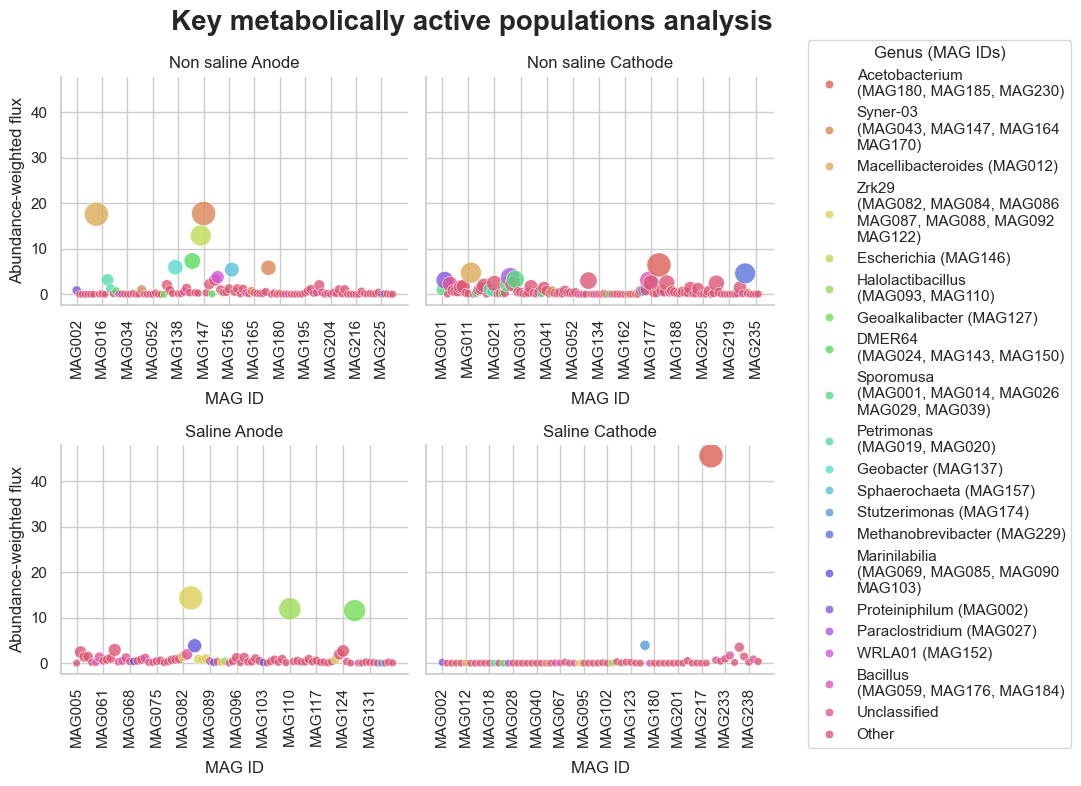

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# ==== data process ====
plot_df["Activity"] = pd.to_numeric(plot_df["Activity"], errors="coerce")
plot_df = plot_df.dropna(subset=["Activity"])
plot_df["genus"] = plot_df["genus"].fillna("Unclassified")
plot_df["Group"] = plot_df["Group"].str.replace("_", " ")

# ==== select top genus ====
top_n = 20
genus_scores = plot_df.groupby("genus")["Activity"].sum().sort_values(ascending=False)
top_genus = genus_scores.head(top_n).index

# ==== create display genus for plot ====
plot_df["GenusDisplay"] = plot_df["genus"].apply(lambda x: x if x in top_genus else "Other")

# ==== GenusDisplay sort ====
genus_order = [g for g in top_genus if g not in ["Unclassified", "Other"]]
genus_order += ["Unclassified", "Other"]
genus_cat = CategoricalDtype(categories=genus_order, ordered=True)
plot_df["GenusDisplay"] = plot_df["GenusDisplay"].astype(genus_cat)

# ==== wrap MAGs ====
def wrap_mags(mag_list, max_per_line=3):
    if len(mag_list) <= 1:
        return ", ".join(mag_list)
    lines = [", ".join(mag_list[i:i + max_per_line]) for i in range(0, len(mag_list), max_per_line)]
    return "\n".join(lines)


# ==== build legend mapping with wrapped MAG IDs ====
genus_to_genomes = (
    plot_df[plot_df["GenusDisplay"].isin(genus_order) & (~plot_df["GenusDisplay"].isin(["Unclassified", "Other"]))]
    .groupby("GenusDisplay")["Genome"]
    .unique()
    .apply(lambda mags: wrap_mags(sorted(mags)))
    .to_dict()
)

# ==== build genus label dictionary with MAG IDs ====
genus_label_dict = {}
for genus in genus_order:
    if genus in ["Unclassified", "Other"]:
        genus_label_dict[genus] = genus
    else:
        mags = sorted(plot_df[plot_df["GenusDisplay"] == genus]["Genome"].unique())
        if len(mags) == 1:
            genus_label_dict[genus] = f"{genus} ({mags[0]})"
        else:
            wrapped = wrap_mags(mags)
            genus_label_dict[genus] = f"{genus}\n({wrapped})"

# ==== set color palette ====
palette = sns.color_palette("hls", n_colors=len(genus_order))
palette_dict = dict(zip(genus_order, palette))

# ==== set FacetGrid ====
sns.set(style="whitegrid")
g = sns.FacetGrid(
    plot_df,
    col="Group",
    col_wrap=2,
    height=4,
    sharex=False,
    sharey=True
)

# ==== main plot：color=hue GenusDisplay，size=Activity ====
g.map_dataframe(
    sns.scatterplot,
    x="Genome", y="Activity",
    hue="GenusDisplay", size="Activity",
    sizes=(30, 300), alpha=0.8,
    palette=palette_dict
)

# ==== get and reorder legend ====
handles, labels = g.axes[0].get_legend_handles_labels()
label_handle_dict = {l: h for h, l in zip(handles, labels) if l in genus_order}
sorted_filtered = [(label_handle_dict[l], genus_label_dict.get(l, l)) for l in genus_order if l in label_handle_dict]

g.fig.legend(
    *zip(*sorted_filtered),
    title="Genus (MAG IDs)",
    loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

# ==== set x/y label ====
for ax in g.axes.flat:
    ax.set_xlabel("MAG ID", labelpad=10)
    ax.set_ylabel("Abundance-weighted flux")

# ==== cut x density ====
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
    xticks = ax.get_xticks()
    xticklabels = ax.get_xticklabels()
    step = max(1, int(len(xticks) / 12))
    ax.set_xticks(xticks[::step])
    ax.set_xticklabels(
        [label.get_text() for i, label in enumerate(xticklabels) if i % step == 0],
        rotation=90
    )

# ==== title ====
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Key metabolically active populations analysis", 
               fontsize=20, fontweight='bold', x=0.6)
plt.tight_layout()
plt.show()